In [1]:
from pulp import *
import utils

In [2]:
INSTANCE_NUMBER = 10
ALL_SOLUTIONS = False
ROTATION = True

file_path = f"../instances/ins-{INSTANCE_NUMBER}.txt"
w, n, dims = utils.read_output(file_path)

In [3]:
WIDTH = 0
HEIGHT = 1

In [4]:
upper_bound = sum(dims[:, HEIGHT])
k = 4 if not ROTATION else 8 # Number of constraints

In [5]:
prob = LpProblem("VLSI", LpMinimize)

In [6]:
L = LpVariable("L", 0, upper_bound, LpInteger)
pos_x = LpVariable.dicts("pos_x", range(n), 0, w, LpInteger)
pos_y = LpVariable.dicts("pos_y", range(n), 0, upper_bound, LpInteger)

In [7]:
M0 = M1 = w
M2 = M3 = upper_bound

In [8]:
pos_chosen = LpVariable.dict("pos_chosen", (range(n), range(n), range(k)), 0, 1, LpInteger)
rotated = LpVariable.dict("rotated", (range(n), range(2)), 0, 1, LpInteger)

In [9]:
prob += L

In [10]:
if ROTATION:
    for i in range(n):
        prob += L >= pos_y[i] + dims[i, HEIGHT]
        for j in range(i + 1, n):
            prob += pos_x[i] + dims[i, WIDTH] <= pos_x[j] + M0 * (pos_chosen[i, j, 0] + rotated[i, 0])
            #prob += pos_x[j] + dims[j, WIDTH] <= pos_x[i] + M1 * (pos_chosen[i, j, 1] + rotated[j, 0])
            prob += pos_x[j] + dims[j, WIDTH] <= pos_x[i] + M1 * (pos_chosen[i, j, 1])
            prob += pos_y[i] + dims[i, HEIGHT] <= pos_y[j] + M2 * (pos_chosen[i, j, 2] + rotated[i, 0])
            prob += pos_y[j] + dims[j, HEIGHT] <= pos_y[i] + M3 * (pos_chosen[i, j, 3])
            #prob += pos_y[j] + dims[j, HEIGHT] <= pos_y[i] + M3 * (pos_chosen[i, j, 3] + rotated[j, 0])
            
            prob += pos_x[i] + dims[i, HEIGHT] <= pos_x[j] + M0 * (pos_chosen[i, j, 0] + rotated[i, 1])
            #prob += pos_x[j] + dims[j, HEIGHT] <= pos_x[i] + M1 * (pos_chosen[i, j, 1] + rotated[j,1])
            prob += pos_y[i] + dims[i, WIDTH] <= pos_y[j] + M2 * (pos_chosen[i, j, 2] + rotated[i,1])
            #prob += pos_y[j] + dims[j, WIDTH] <= pos_y[i] + M3 * (pos_chosen[i, j, 3] + rotated[j,1])
        
            prob += lpSum([pos_chosen[i, j, k] for k in range(k)]) <= 3
            prob += lpSum(rotated[i,k] for k in range(2)) == 1
            #prob += lpSum(rotated[j,k] for k in range(2)) == 1

    
        if i==(n-1):
                prob += pos_x[i] + dims[j, WIDTH] <= M0 * (pos_chosen[i, i, 0] + rotated[i, 0])
                prob += pos_y[i] + dims[j, HEIGHT] <= M2 * (pos_chosen[i, i, 2] + rotated[i, 0])
                prob += pos_x[i] + dims[i, HEIGHT] <= M1 * (pos_chosen[i, i, 1] + rotated[i,1])
                prob += pos_y[i] + dims[i, WIDTH] <= M3 * (pos_chosen[i, i, 3] + rotated[i,1])  
                prob += lpSum([pos_chosen[i, i, k] for k in range(k)]) <= 3   
                prob += lpSum(rotated[i,k] for k in range(2)) == 1


        

In [11]:
if not ROTATION:
    for i in range(n):
        prob += L >= pos_y[i] + dims[i, HEIGHT]
        for j in range(i + 1, n):
            prob += pos_x[i] + dims[i, WIDTH] <= pos_x[j] + M0 * pos_chosen[i, j, 0]
            prob += pos_x[j] + dims[j, WIDTH] <= pos_x[i] + M1 * pos_chosen[i, j, 1]
            prob += pos_y[i] + dims[i, HEIGHT] <= pos_y[j] + M2 * pos_chosen[i, j, 2]
            prob += pos_y[j] + dims[j, HEIGHT] <= pos_y[i] + M3 * pos_chosen[i, j, 3]
            prob += lpSum([pos_chosen[i, j, k] for k in range(k)]) <= k - 1


In [12]:
status = prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /usr/local/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/t4/vnxj6kkj2n97knry5lnrscx00000gn/T/53af9b8afffd4c82a400942245902475-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/t4/vnxj6kkj2n97knry5lnrscx00000gn/T/53af9b8afffd4c82a400942245902475-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 551 COLUMNS
At line 3881 RHS
At line 4428 BOUNDS
At line 5014 ENDATA
Problem MODEL has 546 rows, 585 columns and 2158 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 14 - 0.00 seconds
Cgl0003I 0 fixed, 1 tightened bounds, 1 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 5 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 1 strengthened rows, 0 substitutions
Cgl0004I processed model has 479 rows, 30

KeyboardInterrupt: 

In [ ]:
LpStatus[status]

'Optimal'

In [ ]:
print(f"value of L: {value(L)}")
sol = []
sol.append([w, value(L)])
sol.append([n])
for i in range(n):
    print(i)
    width = dims[i, int(value(rotated[i,0]))]
    height = dims[i, 1-int(value(rotated[i,0]))]

    sol.append([width, height, int(value(pos_x[i])), int(value(pos_y[i]))])
    print(value(pos_x[i]), value(pos_y[i]))

value of L: 14.0
0
7.0 11.0
1
13.0 0.0
2
10.0 2.0
3
14.0 5.0
4
7.0 0.0
5
7.0 3.0
6
4.0 2.0
7
14.0 11.0
8
10.0 6.0
9
0.0 0.0
10
0.0 11.0
11


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import math
import os

def visualize_output(output):
    w = output[0][0]
    l = output[0][1]
    n = output[1][0]
    roation = output[-1]
    if len(roation) != n:
            roation = [0]*n
            output.append(roation)
    elif n==4:
            if not all([ r == 0 or r == 1 for r in roation ]):
                roation = [0]*n
                output.append(roation)

    colors = np.array(['red', 'green', 'blue', 'yellow', 'orange', 'pink', 'purple', 'brown']*(math.ceil(n/8)))


    fig = plt.figure(figsize=(w/2, l/2))
    ax = fig.gca()
    ax.set_xticks(np.arange(0, w+1, 1))
    ax.set_yticks(np.arange(0, l+1, 1))
    plt.grid()
    for i, [width, height, x, y] in enumerate(np.array(output[2:-1])):
        rect = patches.Rectangle((x, y), width, height, linewidth=3, edgecolor='black', facecolor=colors[i])
        ax.add_patch(rect)
        ax.text(x+width/2-0.7, y+height/2, 'Rotated' if roation[i] else '')
    plt.show()
    return fig

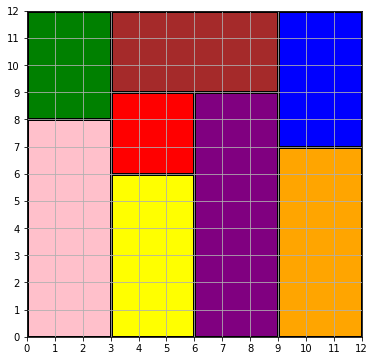

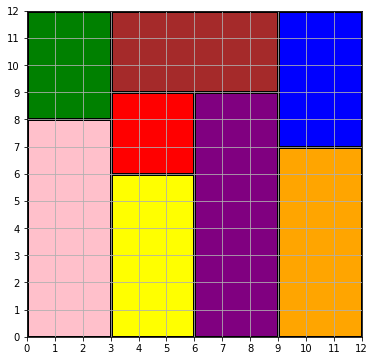

In [ ]:
visualize_output(sol)